In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
train=pd.read_csv('Train_SU63ISt.csv')
test=pd.read_csv('Test_0qrQsBZ.csv')

In [197]:
train_original=train.copy()
test_original=test.copy()
train.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [198]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [199]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [200]:
for i in (train,test,train_original,test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [201]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [202]:
def applier (row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0

In [203]:
train['weekend']=temp.apply(applier)
#train.head()

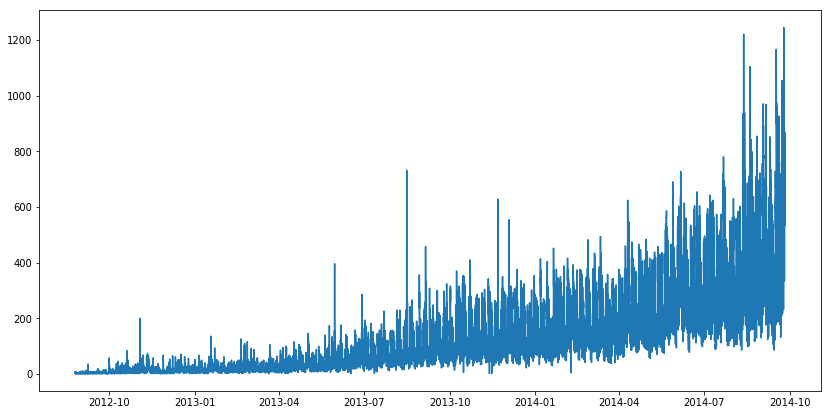

In [204]:
train.index = train['Datetime']## indexing the Datetime to get the time period on the x-axis.
plt.figure(figsize=(14,7))
plt.plot(train.Count,label='No of passenger')



In [205]:
import seaborn as sns

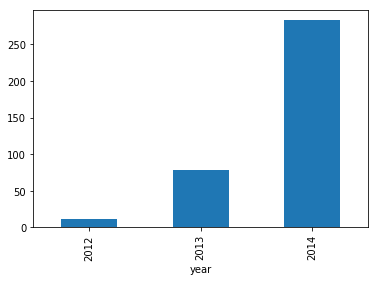

In [206]:
train.groupby('year')['Count'].mean().plot.bar()

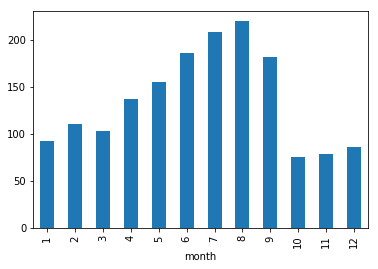

In [207]:
train.groupby('month')['Count'].mean().plot.bar()

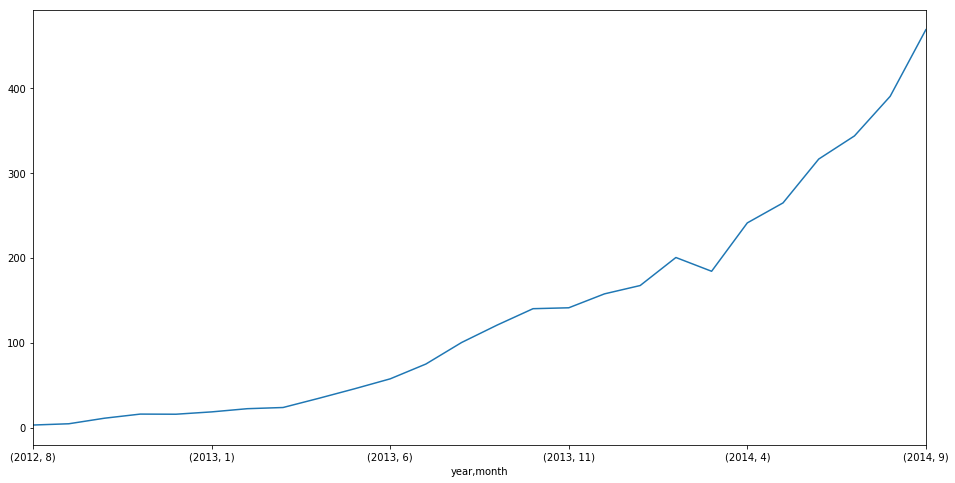

In [208]:
train.groupby(['year','month'])['Count'].mean().plot(figsize=(16,8))

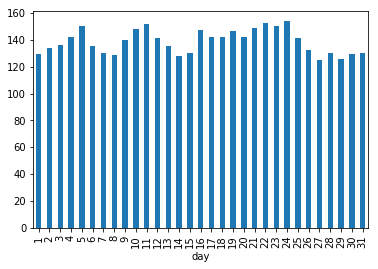

In [209]:
train.groupby('day')['Count'].mean().plot.bar()

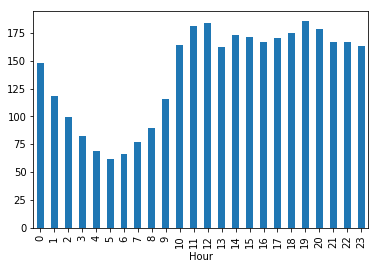

In [210]:
train.groupby('Hour')['Count'].mean().plot.bar()

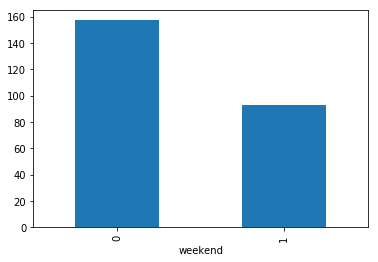

In [211]:
train.groupby('weekend')['Count'].mean().plot.bar()

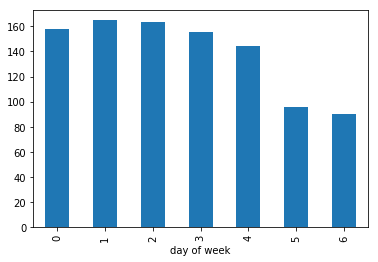

In [212]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [213]:
train=train.drop('ID',axis=1)


In [214]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [215]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train.head()

C:\Users\Harishankar2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [216]:
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()
weekly.shape


(110, 7)

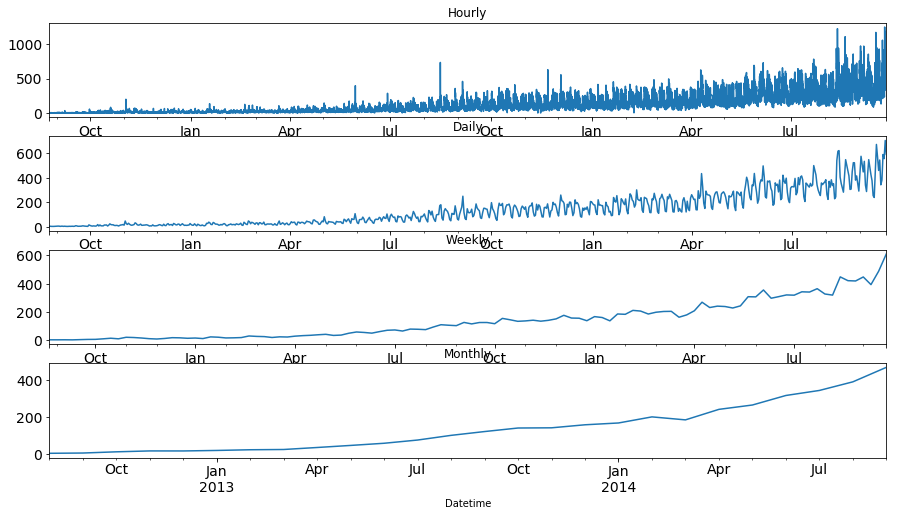

In [217]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()

In [220]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  


C:\Users\Harishankar2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [221]:
test = test.resample('D').mean()
test.head()

,ID,year,month,day,Hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


In [224]:
train = train.resample('D').mean()

In [225]:
train

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
2012-08-30,3.083333,2012.0,8.0,30.0,11.5,3.0,0.0
2012-08-31,3.250000,2012.0,8.0,31.0,11.5,4.0,0.0
2012-09-01,4.666667,2012.0,9.0,1.0,11.5,5.0,1.0
2012-09-02,4.916667,2012.0,9.0,2.0,11.5,6.0,1.0


In [226]:
Train=train.loc['2012-08-25':'2014-06-24']
Validation=train.loc['2014-06-25':'2014-09-25']

In [227]:
Train.shape

(669, 7)

Text(0, 0.5, 'passenger count')

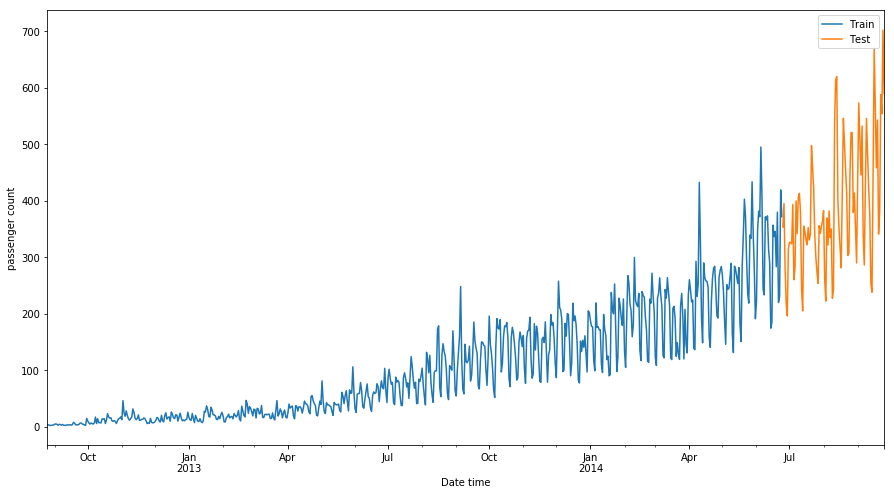

In [228]:
Train.Count.plot(figsize=(15,8),label='Train')
Validation.Count.plot(figsize=(15,8),label='Test')
plt.legend()
plt.xlabel("Date time")
plt.ylabel('passenger count')

# Naive Approch



we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction

In [229]:
Validation['Naive pred']=Train['Count'][len(Train.Count)-1]

C:\Users\Harishankar2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
Validation.head()

,Count,year,month,day,Hour,day of week,weekend,Naive pred
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667


Text(0, 0.5, 'Passenger count')

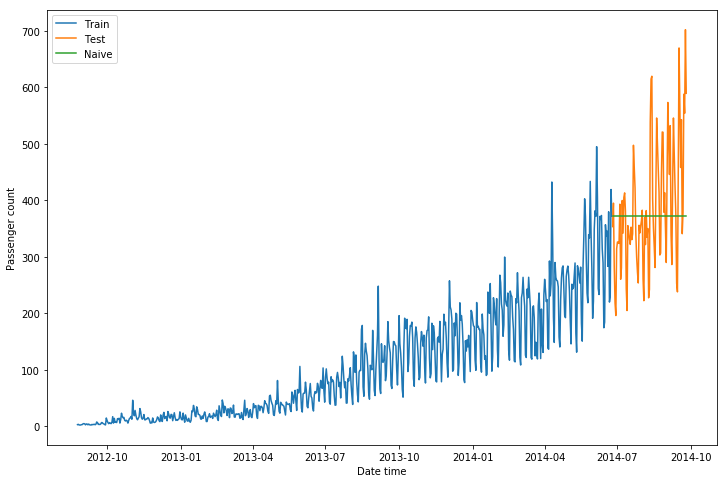

In [231]:
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train.Count,label='Train')
plt.plot(Validation.index,Validation.Count,label='Test')
plt.plot(Validation.index,Validation['Naive pred'],label='Naive')
plt.legend()
plt.xlabel('Date time')
plt.ylabel('Passenger count')

In [232]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Validation.Count,Validation['Naive pred']))

111.79050467496724

### Moving Avarage

In [233]:
y_hat=Validation.copy()
y_hat['moving-10']=Train.Count.rolling(10).mean().iloc[-1]
y_hat['moving-20']=Train.Count.rolling(20).mean().iloc[-1]
y_hat['moving-50']=Train.Count.rolling(50).mean().iloc[-1]

y_hat.head()

,Count,year,month,day,Hour,day of week,weekend,Naive pred,moving-10,moving-20,moving-50
Datetime,,,,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667,313.033333,319.916667,296.626667
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667,313.033333,319.916667,296.626667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667,313.033333,319.916667,296.626667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667,313.033333,319.916667,296.626667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667,313.033333,319.916667,296.626667


In [234]:
np.sqrt(mean_squared_error(y_hat.Count,y_hat['moving-10']))

134.23733308950264

In [235]:
np.sqrt(mean_squared_error(y_hat.Count,y_hat['moving-20']))

130.44984977550422

In [236]:
np.sqrt(mean_squared_error(y_hat.Count,y_hat['moving-50']))

144.19175679986802

### Simple Exponential Smoothing 

In [237]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat.SES=fit2.forecast(len(Validation))


C:\Users\Harishankar2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [238]:
np.sqrt(mean_squared_error(y_hat.Count,y_hat.SES))

113.43708111884514

### Holt’s Linear Trend Model

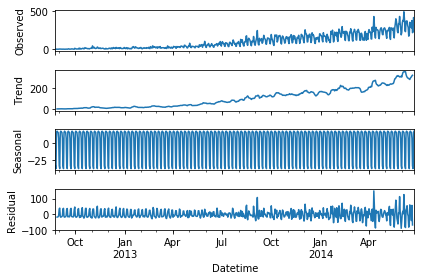

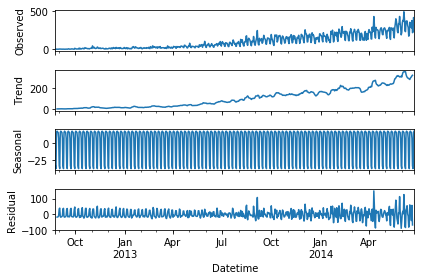

In [239]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()

In [240]:
y_hat=Validation.copy()

In [241]:
fit1=Holt(np.asarray(Train.Count)).fit(smoothing_level=.24,smoothing_slope=0.1)
y_hat['forecast']=fit1.forecast(len(Validation))

In [262]:
y_hat.head()

,Count,year,month,day,Hour,day of week,weekend,Naive pred,forecast
Datetime,,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667,325.557532
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667,327.078999
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667,328.600466
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667,330.121933
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667,331.643400


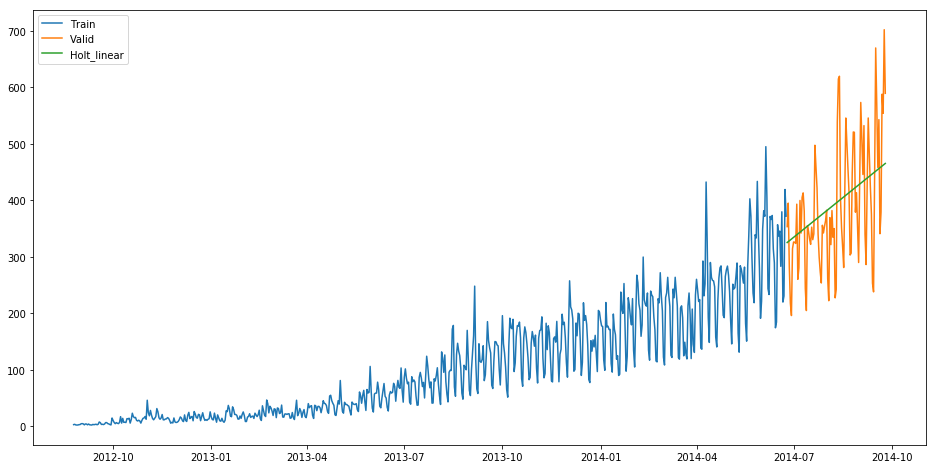

In [243]:
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Validation['Count'], label='Valid') 
plt.plot(y_hat['forecast'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [244]:
np.sqrt(mean_squared_error(y_hat.Count,y_hat.forecast))

96.22036882936749

In [245]:
submission=pd.read_csv("Sample_Submission_QChS6c3.csv")

In [246]:
submission

,ID,Count


In [247]:
predict=fit1.forecast(len(test))

In [248]:
test['pred']=predict

In [249]:
test.head()

,ID,year,month,day,Hour,pred
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,325.557532
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,327.078999
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,328.600466
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,330.121933
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,331.643400


In [250]:
train_original['ratio']=train_original.Count/train_original.Count.sum()
train_original.head()

,ID,Datetime,Count,year,month,day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07


In [251]:
temp=train_original.groupby('Hour')['ratio'].sum()
type(temp)

pandas.core.series.Series

In [252]:
temp2=pd.DataFrame(temp).reset_index()
temp2.ratio.sum()

1.0

In [253]:
test.head()
#len(test)

,ID,year,month,day,Hour,pred
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,325.557532
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,327.078999
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,328.600466
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,330.121933
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,331.643400


In [254]:
test_original.head()
#len(test_original)

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [255]:
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge.head()
#len(merge)


,ID_x,year,month,day,Hour_x,pred,ID_y,Datetime,Hour_y
0,18299.5,2014.0,9.0,26.0,11.5,325.557532,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,325.557532,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,325.557532,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,325.557532,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,325.557532,18292,2014-09-26 04:00:00,4


In [256]:
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
merge.head()

,ID_x,day,pred,ID_y,Hour
0,18299.5,26.0,325.557532,18288,0
1,18299.5,26.0,325.557532,18289,1
2,18299.5,26.0,325.557532,18290,2
3,18299.5,26.0,325.557532,18291,3
4,18299.5,26.0,325.557532,18292,4


In [266]:
prediction=pd.merge(merge, temp2, on='Hour', how='left')

In [267]:
prediction['Count']=prediction['pred']*prediction['ratio']*24 

In [268]:
train_original.tail()

,ID,Datetime,Count,year,month,day,Hour,ratio
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,0.000342
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,0.000288
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,0.000276
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,0.000228
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,0.000210


In [269]:
prediction.head()

,ID_x,day,pred,ID_y,Hour,ratio,Count
0,18299.5,26.0,325.557532,18288,0,0.044287,346.027974
1,18299.5,26.0,325.557532,18289,1,0.035343,276.148427
2,18299.5,26.0,325.557532,18290,2,0.029911,233.706625
3,18299.5,26.0,325.557532,18291,3,0.024714,193.103435
4,18299.5,26.0,325.557532,18292,4,0.020802,162.535745


In [271]:
prediction['ID']=prediction['ID_y']
prediction.head()

,ID_x,day,pred,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,325.557532,18288,0,0.044287,346.027974,18288
1,18299.5,26.0,325.557532,18289,1,0.035343,276.148427,18289
2,18299.5,26.0,325.557532,18290,2,0.029911,233.706625,18290
3,18299.5,26.0,325.557532,18291,3,0.024714,193.103435,18291
4,18299.5,26.0,325.557532,18292,4,0.020802,162.535745,18292


In [272]:
prediction=prediction.drop(['ID_x','day','pred','ID_y','Hour','ratio'],1)
prediction.head()

,Count,ID
0,346.027974,18288
1,276.148427,18289
2,233.706625,18290
3,193.103435,18291
4,162.535745,18292


In [277]:
submission=pd.DataFrame(prediction,columns=['ID','Count'])
submission.index=submission.ID
del submission['ID']


In [279]:
submission.to_csv('sub_1.csv')